# Fashion-mnist dataset work

[link to my github's reposetory](https://github.com/Matan-Hodadov/nba-players-kaggle-project)

In [1]:
#import what we need to start working on the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Take a first look and try to understand the data

In [2]:
#show the data
df_train = pd.read_csv('fashion_mnist_data/fashion-mnist_train.csv')
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_train.isna().sum().unique()

array([0], dtype=int64)

In [4]:
df_train['label']

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [5]:
np.sort(df_train['label'].unique())

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

we can see that the first column is the label of the image nad the rest of the columns are presenting each pixal in the image
now lets get some info on how data

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [7]:
df_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


### Lets fine which label represent which cloth.

### We can run each label as see like that:

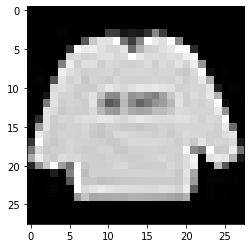

In [8]:
first_image = df_train.iloc[0][1:]

first_image = np.array(first_image, dtype='uint8')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')

### But we can be efficients and just google it :)

### After a quick google search we know that:

<pre>
label     describsion  
0         t-shirt/top
1         trouser - pants
2         pullover - sweader
3         dress
4         coat
5         sandals
6         shirt
7         sneaker
8         bag
9         ankle boots
</pre>

# Lets add the testing set

In [9]:
df_test = pd.read_csv('fashion_mnist_data/fashion-mnist_test.csv')
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df_test.isna().sum().unique()

array([0], dtype=int64)

In [11]:
y_train = df_train['label']

X_train = df_train.drop('label', 1)

In [12]:
y_test = df_test['label']

X_test = df_test.drop('label', 1)

lets use pca to decrease the number of dimensions from 28*28=784

lets plot a graph to see the ratio between the number of dimensions and variance 

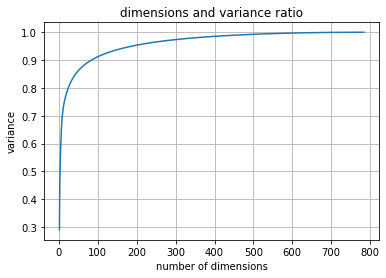

In [13]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
x = np.arange(1, len(cumsum)+1)
plt.plot(x, cumsum)
plt.xlabel('number of dimensions')
plt.ylabel('variance')
plt.title('dimensions and variance ratio')
plt.grid(True)
plt.show()

lets take the number of dimensions that will give us a variance of 0.88 of the data

In [14]:
pca = PCA(n_components=0.88, random_state=0)
pca.fit(X_train)
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

before we go to the models lets import some librarys to evaluate out models

In [15]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

In [17]:
# precision - tp / (tp + fp)
# recall - tp / (tp + fn)
# F1 score - (precision*recall) / (precision+recall)

# MODELS

## RANDOM FOREST

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(max_depth=None, random_state=0)
rf_cross_val = cross_validate(rf_clf, X_train_reduced, y_train, cv = 5, n_jobs = -1)
rf_scores = rf_cross_val["test_score"]
rf_time = rf_cross_val["fit_time"] + rf_cross_val["score_time"]

In [19]:
print(rf_scores)
print(rf_scores.mean())
print(rf_scores.std())
print("amount of time in totoal: ", rf_time.sum(), "seconds")

[0.86516667 0.86633333 0.87166667 0.86325    0.862     ]
0.8656833333333334
0.0033459760243545805
amount of time in totoal:  708.4966125488281 seconds


In [20]:
rf_predictions = cross_val_predict(rf_clf, X_train_reduced, y_train, cv=5, n_jobs=-1)

print(confusion_matrix(y_train, rf_predictions))
print(classification_report(y_train, rf_predictions))
print(metrics.accuracy_score(y_train, rf_predictions))

[[5145    5   87  216   29   11  433    0   73    1]
 [  18 5745   35  159   11    0   28    0    3    1]
 [  48    0 4833   58  615    8  383    0   55    0]
 [ 185   21   35 5391  185    1  153    0   27    2]
 [  12    5  502  224 4857    5  345    0   50    0]
 [   0    0    0    3    0 5596    1  225   23  152]
 [ 976    6  712  150  543    7 3499    0  107    0]
 [   0    0    0    0    0  223    0 5480    5  292]
 [  10    0   32   41   26   66   61   19 5733   12]
 [   0    0    0    1    0  119    0  214    4 5662]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      6000
           1       0.99      0.96      0.98      6000
           2       0.78      0.81      0.79      6000
           3       0.86      0.90      0.88      6000
           4       0.78      0.81      0.79      6000
           5       0.93      0.93      0.93      6000
           6       0.71      0.58      0.64      6000
           7       0.92      0.91   

# KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

# #now lets find the optimum K 
# mean_score_rate = []
# for i in range(1,20):
#     knn_clf = KNeighborsClassifier(n_neighbors=i)
#     knn_scores = cross_val_score(knn_clf, X_train_reduced, y_train, cv = 5)
#     if knn_scores.std() > 0.01 :
#         mean_score_rate.append(0)
#     else:
#         mean_score_rate.append(knn_scores.mean())
# index = mean_score_rate.index(max(mean_score_rate)) + 1
# index
print("8")

8


In [22]:
knn_clf = KNeighborsClassifier(n_neighbors=8)
knn_cross_val = cross_validate(knn_clf, X_train_reduced, y_train, cv = 5, n_jobs = -1)
knn_scores = knn_cross_val["test_score"]
knn_time = knn_cross_val["fit_time"] + knn_cross_val["score_time"]

In [23]:
print(knn_scores)
print(knn_scores.mean())
print(knn_scores.std())
print("amount of time in totoal: ", knn_time.sum(), "seconds")

[0.86233333 0.86016667 0.86233333 0.856      0.86066667]
0.8603
0.002319961685507366
amount of time in totoal:  335.6150040626526 seconds


In [24]:
knn_predictions = cross_val_predict(knn_clf, X_train_reduced, y_train, cv=5, n_jobs=-1)

print(confusion_matrix(y_train, knn_predictions))
print(classification_report(y_train, knn_predictions))
print(metrics.accuracy_score(y_train, knn_predictions))

[[5214    4   86  148   41    1  448    1   56    1]
 [  25 5800   22  116    9    0   25    0    2    1]
 [ 105    4 4744   49  650    2  425    0   21    0]
 [ 231   37   53 5313  234    0  119    0   13    0]
 [  27    8  623  219 4654    0  448    0   21    0]
 [   2    0    0    3    0 5385    5  331   18  256]
 [1182    5  726  102  526    0 3389    0   69    1]
 [   0    0    0    0    0   81    0 5654    1  264]
 [  18    1   46   43   37   10   47   29 5762    7]
 [   0    0    2    0    0   42    1  250    2 5703]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.81      6000
           1       0.99      0.97      0.98      6000
           2       0.75      0.79      0.77      6000
           3       0.89      0.89      0.89      6000
           4       0.76      0.78      0.77      6000
           5       0.98      0.90      0.93      6000
           6       0.69      0.56      0.62      6000
           7       0.90      0.94   

# SVC

In [25]:
from sklearn.svm import SVC, LinearSVC

svc_clf = SVC()
svc_cross_val = cross_validate(svc_clf, X_train_reduced, y_train, cv = 5, n_jobs = -1)
svc_scores = svc_cross_val["test_score"]
svc_time = svc_cross_val["fit_time"] + svc_cross_val["score_time"]

In [26]:
print(svc_scores)
print(svc_scores.mean())
print(svc_scores.std())
print("amount of time in totoal: ", svc_time.sum(), "seconds")

[0.88233333 0.88525    0.88833333 0.88033333 0.88308333]
0.8838666666666667
0.002731808517773123
amount of time in totoal:  1920.2318427562714 seconds


In [27]:
svc_predictions = cross_val_predict(svc_clf, X_train_reduced, y_train, cv=5, n_jobs=-1)

print(confusion_matrix(y_train, svc_predictions))
print(classification_report(y_train, svc_predictions))
print(metrics.accuracy_score(y_train, svc_predictions))

[[5175    4   71  200   13    3  490    0   43    1]
 [  21 5772   21  149    7    0   26    0    3    1]
 [  60    2 4903   65  557    2  390    0   21    0]
 [ 164   21   39 5434  193    0  129    0   20    0]
 [  10    6  452  205 4941    0  371    0   15    0]
 [   2    0    0    3    0 5701    0  218   16   60]
 [ 877    7  567  140  448    1 3895    0   65    0]
 [   0    0    0    0    0  107    0 5670    8  215]
 [  13    2   28   29   21   11   52   15 5826    3]
 [   0    0    0    1    0   72    0  210    2 5715]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      6000
           1       0.99      0.96      0.98      6000
           2       0.81      0.82      0.81      6000
           3       0.87      0.91      0.89      6000
           4       0.80      0.82      0.81      6000
           5       0.97      0.95      0.96      6000
           6       0.73      0.65      0.69      6000
           7       0.93      0.94   

# ADABOOST

### we can use the random forest from the first modal

In [28]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(rf_clf, n_estimators=200, learning_rate=0.5)
ada_cross_val = cross_validate(ada_clf, X_train_reduced, y_train, cv = 5, n_jobs = -1)
ada_scores = ada_cross_val["test_score"]
ada_time = ada_cross_val["fit_time"] + ada_cross_val["score_time"]

In [29]:
print(ada_scores)
print(ada_scores.mean())
print(ada_scores.std())
print("amount of time in totoal: ", ada_time.sum(), "seconds")

[0.86525    0.86616667 0.87016667 0.86225    0.86483333]
0.8657333333333334
0.0025698032782469752
amount of time in totoal:  450.8786098957062 seconds


In [30]:
ada_predictions = cross_val_predict(ada_clf, X_train_reduced, y_train, cv=5, n_jobs=-1)

print(confusion_matrix(y_train, ada_predictions))
print(classification_report(y_train, ada_predictions))
print(metrics.accuracy_score(y_train, ada_predictions))

[[5127    4   84  229   29    9  438    0   79    1]
 [  20 5757   30  153   13    0   22    0    4    1]
 [  58    2 4855   62  606    8  364    0   45    0]
 [ 176   23   34 5394  185    2  149    0   35    2]
 [  14    4  542  232 4827    3  326    0   52    0]
 [   0    0    0    5    0 5623    0  217   21  134]
 [ 983    5  721  141  552    7 3480    0  111    0]
 [   0    0    0    0    0  229    0 5472    4  295]
 [  14    0   31   36   28   60   53   23 5743   12]
 [   1    0    0    0    1  116    0  207    3 5672]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.83      6000
           1       0.99      0.96      0.98      6000
           2       0.77      0.81      0.79      6000
           3       0.86      0.90      0.88      6000
           4       0.77      0.80      0.79      6000
           5       0.93      0.94      0.93      6000
           6       0.72      0.58      0.64      6000
           7       0.92      0.91   

# GAUSSIAN NAIVE BAYES

In [53]:
from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()
gnb_cross_val = cross_validate(gnb_clf, X_train_reduced, y_train, cv = 5, n_jobs = -1)
gnb_scores = gnb_cross_val["test_score"]
gnb_time = gnb_cross_val["fit_time"] + gnb_cross_val["score_time"]

In [54]:
print("scores are: " , gnb_scores)
print("mean score: " , gnb_scores.mean())
print("std score: " , gnb_scores.std())
print("amount of time in totoal: ", gnb_time.sum(), "seconds")

scores are:  [0.78008333 0.7755     0.77641667 0.77466667 0.77841667]
mean score:  0.7770166666666667
std score:  0.001977231510077798
amount of time in totoal:  3.595484972000122 seconds


In [55]:
gnb_predictions = cross_val_predict(gnb_clf, X_train_reduced, y_train, cv=5, n_jobs=-1)

print(confusion_matrix(y_train, gnb_predictions))
print(classification_report(y_train, gnb_predictions))
print(metrics.accuracy_score(y_train, gnb_predictions))

[[4663    1  119  417   24   31  425    0  320    0]
 [  33 5447  112  264   19    8   66    0   51    0]
 [ 102    0 3844   43  799   32  959    0  220    1]
 [ 405   30   62 4889  181   17  320    0   96    0]
 [  35    3  671  293 3987    4  885    1  121    0]
 [  10    0    1    4    0 4756   79  800  217  133]
 [1067    1  746  228  491   22 3081    0  364    0]
 [   2    0    0    0    0  286   15 5284   15  398]
 [  55    0   49   50   46  152  234  127 5280    7]
 [   2    0    0    0    0  132   18  391   67 5390]]
              precision    recall  f1-score   support

           0       0.73      0.78      0.75      6000
           1       0.99      0.91      0.95      6000
           2       0.69      0.64      0.66      6000
           3       0.79      0.81      0.80      6000
           4       0.72      0.66      0.69      6000
           5       0.87      0.79      0.83      6000
           6       0.51      0.51      0.51      6000
           7       0.80      0.88   

creat a df to put all the data we collected to one place 

In [57]:
dt = {}
dt.update({"model name" : ["random forest", "knn", "svc", "adaboost",  "naive bayes"]})
dt.update({"model mean score" : [rf_scores.mean(), knn_scores.mean(), svc_scores.mean(), ada_scores.mean(), gnb_scores.mean()]})
dt.update({"model total time" : [rf_time.sum(), knn_time.sum(), svc_time.sum(), ada_time.sum(), gnb_time.sum()]})
dt.update({"model object" : [rf_clf, knn_clf, svc_clf, ada_clf, gnb_clf]})
df = pd.DataFrame(data = dt)
df = df.sort_values(by=['model mean score'], ascending=False)
df =  df.set_index(np.arange(1,len(df)+1))
# df.iloc[:, :len(df.columns)-1]
df  #-if you want to show all the df

,model name,model mean score,model total time,model object
1,svc,0.883867,1920.231843,SVC()
2,adaboost,0.865733,450.878610,AdaBoostClassifier(base_estimator=RandomForest...
3,random forest,0.865683,708.496613,RandomForestClassifier(random_state=0)
4,knn,0.860300,335.615004,KNeighborsClassifier(n_neighbors=8)
5,naive bayes,0.777017,3.595485,GaussianNB()


lets take the best model, use ada-boost on him and try to predict the test

In [61]:
best_model = df["model object"][1]

best_model.fit(X_train_reduced, y_train)
best_model_pred = best_model.predict(X_test_reduced)

print(confusion_matrix(y_test, best_model_pred))
print(classification_report(y_test, best_model_pred))
print(metrics.accuracy_score(y_test, best_model_pred))

[[855   0  11  32   0   2  92   0   8   0]
 [  5 971   4  16   0   1   3   0   0   0]
 [ 12   0 813  13  90   0  68   0   4   0]
 [ 22   4  10 917  24   0  21   0   2   0]
 [  0   0  60  27 858   0  53   0   2   0]
 [  0   0   0   0   0 936   1  45   4  14]
 [157   0  82  29  61   0 659   0  12   0]
 [  0   0   0   0   0  21   0 931   0  48]
 [  2   0   5   4   1   1  10   1 975   1]
 [  0   0   0   0   0  11   0  39   0 950]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1000
           1       1.00      0.97      0.98      1000
           2       0.83      0.81      0.82      1000
           3       0.88      0.92      0.90      1000
           4       0.83      0.86      0.84      1000
           5       0.96      0.94      0.95      1000
           6       0.73      0.66      0.69      1000
           7       0.92      0.93      0.92      1000
           8       0.97      0.97      0.97      1000
           9       0.94     

In [64]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=plt.cm.hot, interpolation='nearest')
    plt.axis('off')

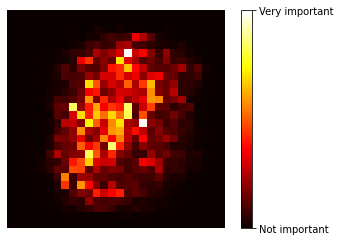

In [66]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)


rnd_clf = RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)
rnd_clf.fit(mnist['data'], mnist['target'])
 
plot_digit(rnd_clf.feature_importances_)
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()